# **1. Import library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# **2. Data Understanding**

## **2.1 Data Loading**

Tahap Data Loading bertujuan untuk memuat dataset yang akan digunakan agar lebih mudah dianalisis. Dataset saya simpan di Google Drive, sehingga perlu menghubungkan Google Drive ke Colab terlebih dahulu. Setelah itu dataset dibaca dengan menggunakan *library* pandas dan ditampilkan 5 baris pertama.

In [2]:
# Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Membaca dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/Crop and fertilizer dataset.csv")
data.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


## **2.2 Exploratory Data Analysis (EDA)**

### 2.2.1 Pengecekan Informasi Umum Data

In [4]:
# Menghapus kolom tidak relevan
data = data.drop(columns=['District_Name', 'Link'])

Dikarenakan kolom 'District_Name' dan 'Link' tidak relevan untuk analisis dan tidak mempengaruhi model, maka dilakukan penghapusan kedua kolom tersebut.

In [5]:
# Cek dimensi data
data.shape

(4513, 9)

In [6]:
# Cek info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Soil_color   4513 non-null   object 
 1   Nitrogen     4513 non-null   int64  
 2   Phosphorus   4513 non-null   int64  
 3   Potassium    4513 non-null   int64  
 4   pH           4513 non-null   float64
 5   Rainfall     4513 non-null   int64  
 6   Temperature  4513 non-null   int64  
 7   Crop         4513 non-null   object 
 8   Fertilizer   4513 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 317.4+ KB


In [7]:
# Mendefinisikan fitur numerik dan kategorikal
numerical_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']
categorical_features = ['Soil_color', 'Crop', 'Fertilizer']

In [8]:
# Cek nilai unik pada fitur kategorikal
print("Fertilizer unik: ", data['Fertilizer'].unique())
print("Crop unik: ", data['Crop'].unique())
print("Soil color unik: ", data['Soil_color'].unique())

Fertilizer unik:  ['Urea' 'DAP' 'MOP' '10:26:26 NPK' 'SSP' 'Magnesium Sulphate'
 '13:32:26 NPK' '12:32:16 NPK' '50:26:26 NPK' '19:19:19 NPK'
 'Chilated Micronutrient' '18:46:00 NPK' 'Sulphur' '20:20:20 NPK'
 'Ammonium Sulphate' 'Ferrous Sulphate' 'White Potash' '10:10:10 NPK'
 'Hydrated Lime']
Crop unik:  ['Sugarcane' 'Jowar' 'Cotton' 'Rice' 'Wheat' 'Groundnut' 'Maize' 'Tur'
 'Urad' 'Moong' 'Gram' 'Masoor' 'Soybean' 'Ginger' 'Turmeric' 'Grapes']
Soil color unik:  ['Black' 'Red ' 'Medium Brown' 'Dark Brown' 'Red' 'Light Brown'
 'Reddish Brown']


Dilakukan pengecekan nilai unik pada masing-masing fitur kategorik untuk mempermudah analisis

In [9]:
# Cek statistik deskriptif data
data.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


Dataset tersebut menunjukkan kondisi agrikultur yang cukup beragam.

### 2.2.2 Pengecekan Missing Value dan Duplikat

In [10]:
# Cek nilai null
data.isnull().sum()

,0
Soil_color,0
Nitrogen,0
Phosphorus,0
Potassium,0
pH,0
Rainfall,0
Temperature,0
Crop,0
Fertilizer,0


In [11]:
# Cek nilai NaN
data.isna().sum()

,0
Soil_color,0
Nitrogen,0
Phosphorus,0
Potassium,0
pH,0
Rainfall,0
Temperature,0
Crop,0
Fertilizer,0


In [12]:
# Cek data duplikat
print("Jumlah data duplikat: ", data.duplicated().sum())

Jumlah data duplikat:  0


Data sudah bersih, tidak ada missing value maupun duplikat

### 2.2.3 Pengecekan Outlier

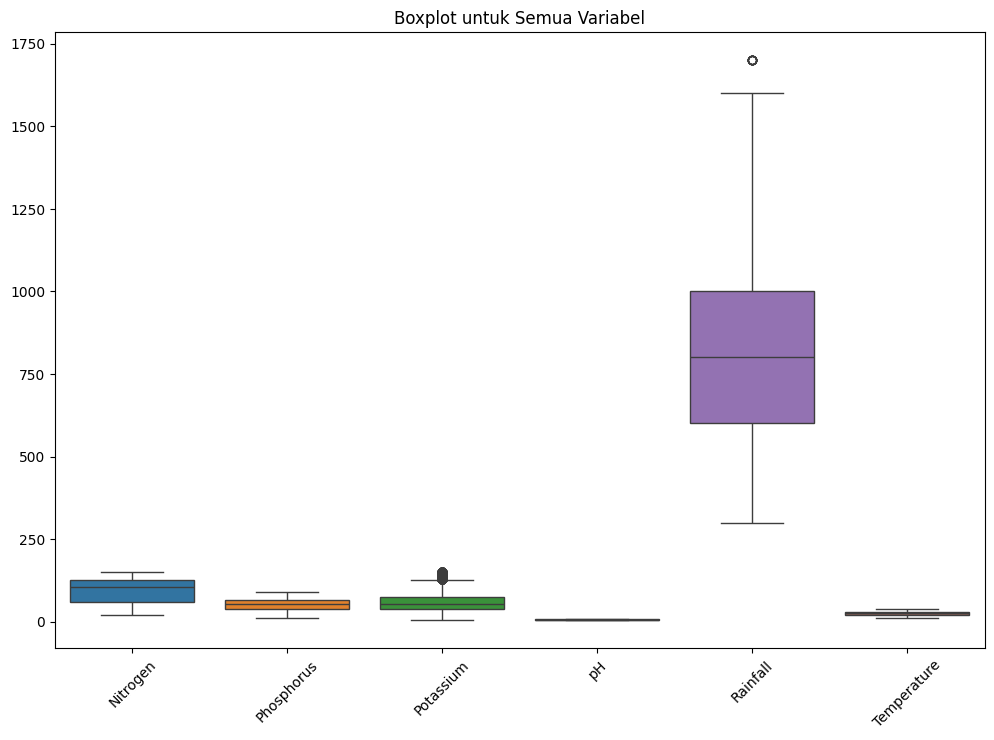

In [13]:
# Boxplot awal untuk melihat outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_features])
plt.title("Boxplot untuk Semua Variabel")
plt.xticks(rotation=45)
plt.show()

Pada visualisasi tersebut outlier tidak terlihat jelas dikarenakan rentang data yang tidak sama antar variabel, sehingga perlu dilakukan normalisasi terlebih dahulu

In [14]:
# Normalisasi fitur numerik dengan MinMaxScaler
scaler = MinMaxScaler()
data2 = scaler.fit_transform(data[numerical_features])
data2 = pd.DataFrame(data2, columns=numerical_features)

In [15]:
# Gabungkan kembali hasil normalisasi dengan fitur kategorikal
data3 = pd.concat([data2, data[categorical_features].reset_index(drop=True)], axis=1)
data3.head()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Soil_color,Crop,Fertilizer
0,0.423077,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
1,0.461538,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
2,0.500000,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
3,0.538462,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
4,0.576923,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea


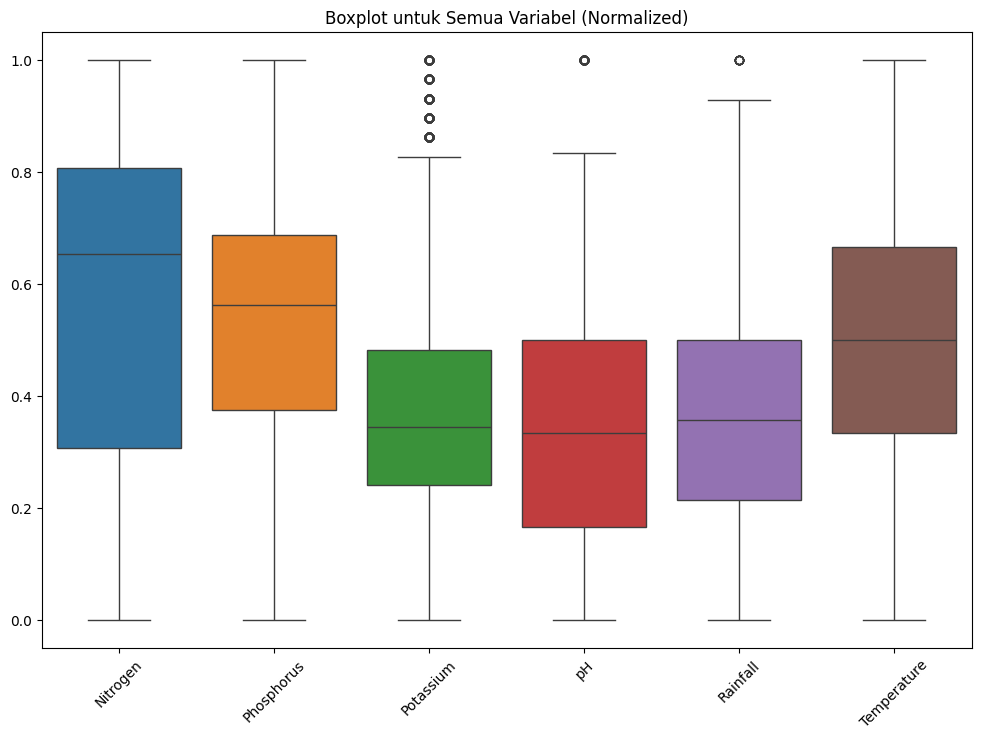

In [16]:
# Boxplot setelah normalisasi
plt.figure(figsize=(12, 8))
sns.boxplot(data=data3)
plt.title("Boxplot untuk Semua Variabel (Normalized)")
plt.xticks(rotation=45)
plt.show()

Skala data sudah seragam, sekarang outlier terlihat jelas pada beberapa variabel sehingga perlu ditangani dengan teknik tertentu

### 2.2.4 Analisis Univariate

Analisis Univariate untuk Fitur: Soil_color
               jumlah sampel  persentase
Soil_color                              
Black                   2260        50.1
Red                      744        16.5
Dark Brown               659        14.6
Red                      480        10.6
Reddish Brown            265         5.9
Light Brown               54         1.2
Medium Brown              51         1.1
Analisis Univariate untuk Fitur: Crop
           jumlah sampel  persentase
Crop                                
Sugarcane           1010        22.4
Wheat                859        19.0
Cotton               650        14.4
Jowar                394         8.7
Maize                350         7.8
Rice                 309         6.8
Groundnut            177         3.9
Tur                  126         2.8
Grapes               125         2.8
Ginger               125         2.8
Urad                  99         2.2
Moong                 99         2.2
Gram                  78       

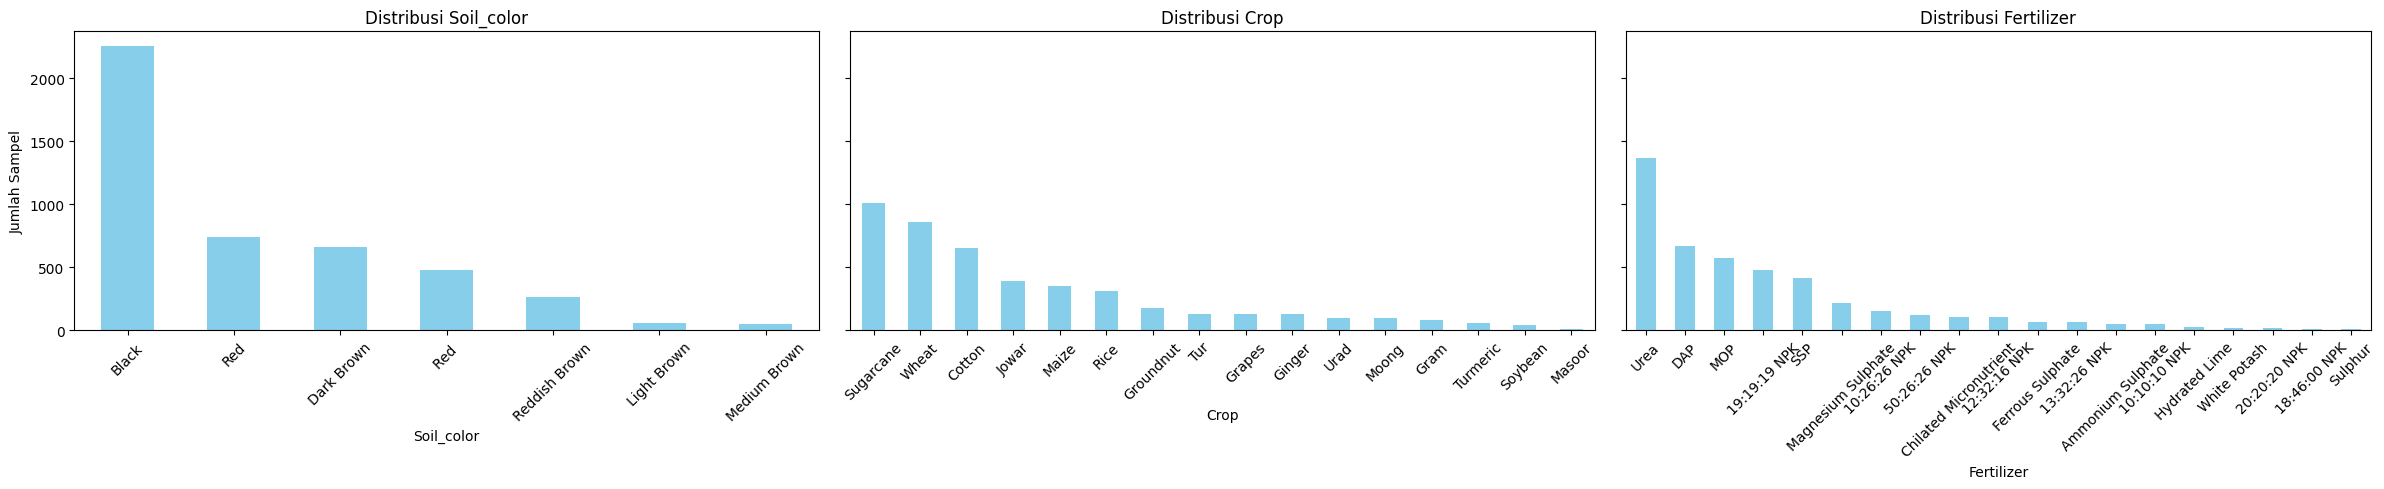

In [17]:
num_features = len(categorical_features)

fig, axes = plt.subplots(1, num_features, figsize=(8 * num_features, 5), sharey=True)

if num_features == 1:
    axes = [axes]

for i, feature in enumerate(categorical_features):
    count = data3[feature].value_counts()
    percent = 100 * data3[feature].value_counts(normalize=True)
    df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})

    print(f"Analisis Univariate untuk Fitur: {feature}")
    print(df)

    count.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribusi {feature}")
    axes[i].set_ylabel("Jumlah Sampel")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

Distribusi data yang ada sangat beragam dan terdapat perbedaan yang signifikan terhadap kelas mayoritas dan minoritas sehingga perlu dilakukan oversampling

### 2.2.5 Pengecekan Correlation Matrix

In [18]:
# Cek data yang sudah bersih
data3.head()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Soil_color,Crop,Fertilizer
0,0.423077,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
1,0.461538,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
2,0.500000,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
3,0.538462,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
4,0.576923,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea


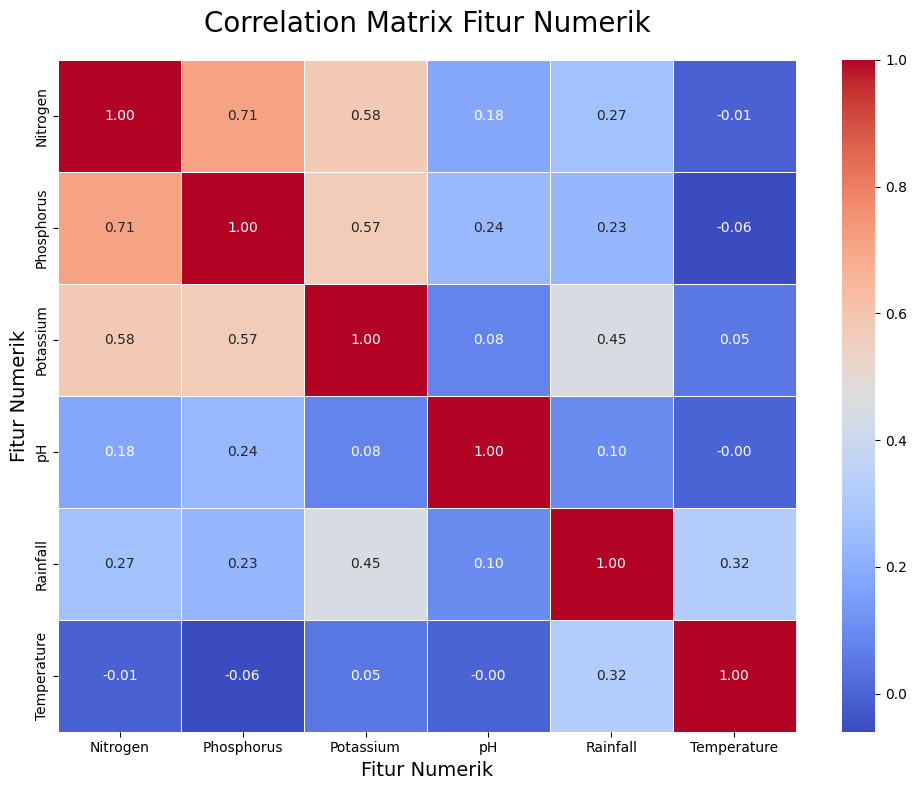

In [19]:
# Correlation matrix fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = data3[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix Fitur Numerik", size=20, pad=20)
plt.xlabel("Fitur Numerik", fontsize=14)
plt.ylabel("Fitur Numerik", fontsize=14)
plt.tight_layout()

# **3. Data Preparation**

## **3.1 Penanganan Outlier**

In [20]:
# Penanganan outlier menggunakan teknik capping
data4 = data2.copy()
for col in numerical_features:
    Q1 = data4[col].quantile(0.25)
    Q3 = data4[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data4[col] = data4[col].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)

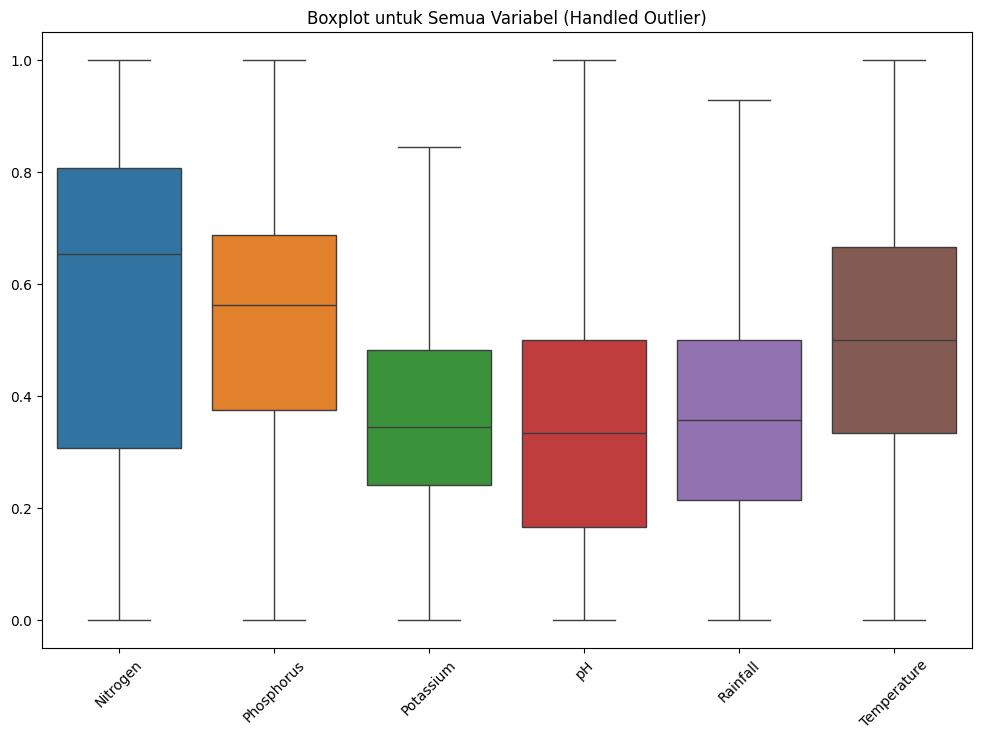

In [21]:
# Boxplot hasil penanganan outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=data4)
plt.title("Boxplot untuk Semua Variabel (Handled Outlier)")
plt.xticks(rotation=45)
plt.show()

Setelah diterapkan teknik capping, pada boxplot terlihat tidak ada lagi outlier pada setiap variabel

## **3.2 Encoding**

Encoding dilakukan agar data dapat diproses oleh model machine learning, sehingga perlu mengubah fitur kategorik menjadi fitur numerik terlebih dahulu

### 3.2.1 Label Encoding

In [22]:
# Gabungkan data clean dengan kolom kategorik
data5 = pd.concat([data4, data[categorical_features].reset_index(drop=True)], axis=1)
data5.head()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Soil_color,Crop,Fertilizer
0,0.423077,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
1,0.461538,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
2,0.500000,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
3,0.538462,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea
4,0.576923,0.5,0.655172,0.333333,0.5,0.333333,Black,Sugarcane,Urea


In [23]:
# Pisahkan fitur (X) dan target label (y)
X = data5.iloc[:, :-1]  # Cleaned data
y = data5[['Fertilizer']]  # Target output

In [24]:
# Buat encoder untuk setiap kolom
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

# Fit dan encode kolom
le_soil.fit(data5['Soil_color'])
data5['Soil_color'] = le_soil.transform(data5['Soil_color'])

le_crop.fit(data['Crop'])
data5['Crop'] = le_crop.transform(data5['Crop'])

le_fert.fit(data['Fertilizer'])
y['Fertilizer'] = le_fert.transform(y['Fertilizer'])

<ipython-input-24-6649125a5e59>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Fertilizer'] = le_fert.transform(y['Fertilizer'])


### 3.2.2 One-Hot Encoding

In [25]:
# Mendefinisikan fitur numerik dan kategorikal
numerical_cols = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']
categorical_cols = ['Soil_color', 'Crop']

# Data training
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Simpan X.columns dan urutannya
X_columns = X.columns

In [26]:
X.head()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Soil_color_Dark Brown,Soil_color_Light Brown,Soil_color_Medium Brown,Soil_color_Red,...,Crop_Maize,Crop_Masoor,Crop_Moong,Crop_Rice,Crop_Soybean,Crop_Sugarcane,Crop_Tur,Crop_Turmeric,Crop_Urad,Crop_Wheat
0,0.423077,0.5,0.655172,0.333333,0.5,0.333333,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.461538,0.5,0.655172,0.333333,0.5,0.333333,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0.500000,0.5,0.655172,0.333333,0.5,0.333333,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.538462,0.5,0.655172,0.333333,0.5,0.333333,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.576923,0.5,0.655172,0.333333,0.5,0.333333,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## **3.3 Splitting dan Oversampling**

### 3.3.1 Splitting Data

In [27]:
# Split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- 80% data untuk pelatihan (X_train, y_train)
- 20% data untuk pengujian (X_test, y_test)

### 3.3.2 Oversampling Data

In [28]:
# Oversampling hanya untuk data training
X_train_resampled, y_train_resampled = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)

In [29]:
# Buat salinan agar tidak merusak data asli
y_train_resampled_decoded = le_fert.inverse_transform(y_train_resampled)

# Ubah ke Series agar bisa pakai value_counts()
y_train_resampled_decoded = pd.Series(y_train_resampled_decoded, name='Fertilizer')


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Analisis Univariate untuk Fitur: Fertilizer
                        jumlah sampel  persentase
Fertilizer                                       
Ferrous Sulphate                 1088         5.3
Urea                             1088         5.3
DAP                              1088         5.3
50:26:26 NPK                     1088         5.3
12:32:16 NPK                     1088         5.3
19:19:19 NPK                     1088         5.3
10:26:26 NPK                     1088         5.3
MOP                              1088         5.3
SSP                              1088         5.3
Chilated Micronutrient           1088         5.3
Magnesium Sulphate               1088         5.3
13:32:26 NPK                     1088         5.3
Hydrated Lime                    1088         5.3
20:20:20 NPK                     1088         5.3
Sulphur                          1088         5.3
Ammonium Sulphate                1088         5.3
10:10:10 NPK                     1088         5.3
18:46:

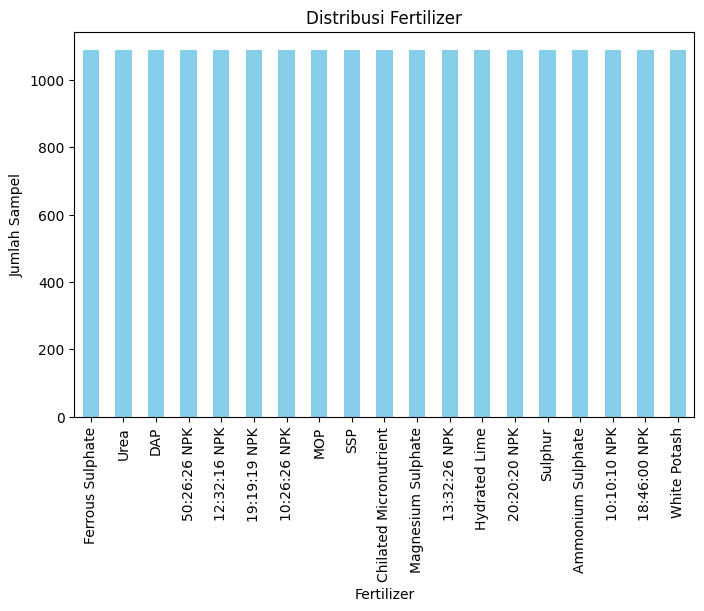

In [30]:
# Analisis univariate
count = y_train_resampled_decoded.value_counts()
percent = 100 * y_train_resampled_decoded.value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print("Analisis Univariate untuk Fitur: Fertilizer")
print(df)

count.plot(kind='bar', title="Distribusi Fertilizer", color='skyblue', figsize=(8, 5))
plt.ylabel("Jumlah Sampel")
plt.show()

Setelah oversampling, data menjadi seragam dan tidak ada data yang lebih dominan.

# **4. Modeling**

## **4.1 Random Forest Base Model**

In [31]:
# RF Base Model
rf_model_base = RandomForestClassifier(random_state=42)
rf_model_base.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [32]:
# Prediksi training
y_train_acc_base = rf_model_base.predict(X_train_resampled)
y_train_acc_base_decoded = le_fert.inverse_transform(y_train_acc_base)
y_train_true_decoded = le_fert.inverse_transform(y_train_resampled.values.ravel())

# Prediksi testing
y_pred_base = rf_model_base.predict(X_test)
y_pred_base_decoded = le_fert.inverse_transform(y_pred_base)
y_test_decoded = le_fert.inverse_transform(y_test.values.ravel())

## **4.2 Random Forest Hyperparameter Tunning**

In [33]:
# RF Hyperparameter Tunning
rf_model_tunned = RandomForestClassifier(
        max_depth=15,          # Batasi kedalaman pohon
        max_features='sqrt',   # Kurangi fitur yang digunakan di setiap split
        min_samples_split=5,   # Minimum sampel untuk membagi node
        random_state=42
    )

rf_model_tunned.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [34]:
# Prediksi training
y_train_acc_tunned = rf_model_tunned.predict(X_train_resampled)
y_train_acc_tunned_decoded = le_fert.inverse_transform(y_train_acc_tunned)
y_train_true_decoded = le_fert.inverse_transform(y_train_resampled.values.ravel())

# Prediksi testing
y_pred_tunned = rf_model_tunned.predict(X_test)
y_pred_tunned_decoded = le_fert.inverse_transform(y_pred_tunned)
y_test_decoded = le_fert.inverse_transform(y_test.values.ravel())

# **5. Model Evaluation**

## **5.1 Confusion Matrix**

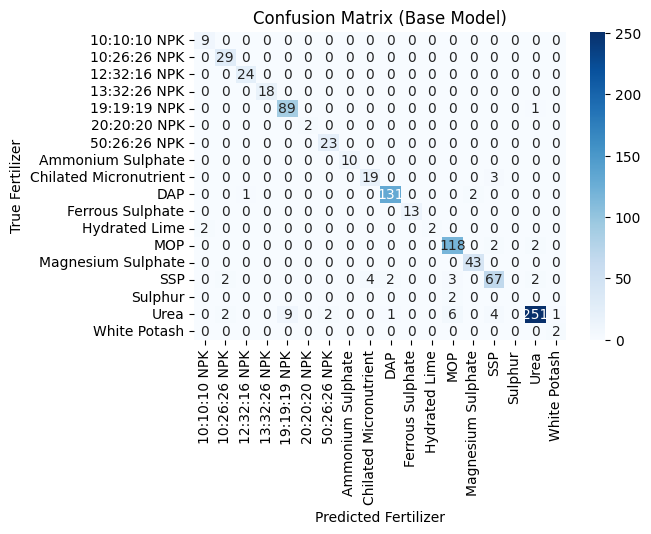

In [35]:
# Confusion Matrix untuk prediksi Fertilizer (Base Model)
cm_fertilizer = confusion_matrix(y_test_decoded, y_pred_base_decoded)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_fertilizer, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_decoded),
            yticklabels=np.unique(y_test_decoded))
plt.xlabel('Predicted Fertilizer')
plt.ylabel('True Fertilizer')
plt.title('Confusion Matrix (Base Model)')
plt.show()

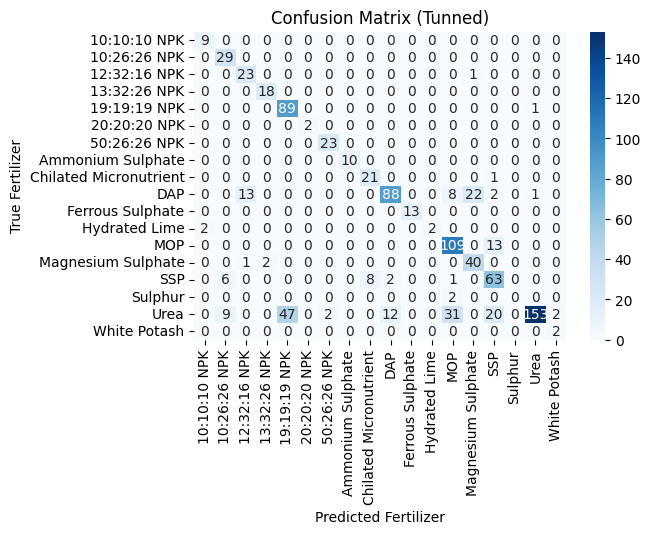

In [36]:
# Confusion Matrix untuk prediksi Fertilizer (Tunned)
cm_fertilizer = confusion_matrix(y_test_decoded, y_pred_tunned_decoded)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_fertilizer, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_decoded),
            yticklabels=np.unique(y_test_decoded))
plt.xlabel('Predicted Fertilizer')
plt.ylabel('True Fertilizer')
plt.title('Confusion Matrix (Tunned)')
plt.show()

## **5.2 Matriks Evaluasi**

In [37]:
def evaluate_single_label(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

In [38]:
# Evaluasi training
train_results_rf_base = evaluate_single_label(y_train_true_decoded, y_train_acc_base_decoded)
train_results_rf_tunned = evaluate_single_label(y_train_true_decoded, y_train_acc_tunned_decoded)

# Evaluasi testing
results_rf_base = evaluate_single_label(y_test_decoded, y_pred_base_decoded)
results_rf_tunned = evaluate_single_label(y_test_decoded, y_pred_tunned_decoded)

In [39]:
# Buat DataFrame rekap evaluasi untuk satu target label saja
rows = []
for model_name, result_test, result_train in [
    ('Random Forest (Base)', results_rf_base, train_results_rf_base),
    ('Random Forest (Tuned)', results_rf_tunned, train_results_rf_tunned)
]:
    rows.append({
        'Model': model_name,
        'Train Accuracy': result_train['Accuracy'],
        'Test Accuracy': result_test['Accuracy'],
        'Precision': result_test['Precision'],
        'Recall': result_test['Recall'],
        'F1-Score': result_test['F1-Score']
    })

summary_df = pd.DataFrame(rows)
print(summary_df)

                   Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0   Random Forest (Base)        0.999855       0.941307   0.941431  0.941307   
1  Random Forest (Tuned)        0.979102       0.768549   0.817174  0.768549   

   F1-Score  
0  0.939894  
1  0.762358  
